# Lab 10

## I. Hill Climbing


The Hill Climbing Method is a simple optimization algorithm that tries to find the optimal solution to a problem by iteratively improving the current solution. It is a local search algorithm, which means that it only considers the solutions that are in the neighborhood of the current solution.

Here's how the Hill Climbing Method works:

1. Start with an initial state -- a candidate to the solution of the problem.

2. Evaluate the current state to determine its quality or fitness.

3. Generate a set of neighboring states by making small modifications to the current one.

3. Evaluate the fitness of each neighboring state.

4. Select the best neighboring state and make it the new current one.

5. Repeat steps 3 to 5 until no further improvement can be made or a predefined stopping criterion is met.

One of the main advantages of the Hill Climbing Method is its simplicity and ease of implementation. 

Consider the Bukin funcion N6, from the basic optimisation benchmark set:

$$f(x,y) =  100 \sqrt{|y-0.01 x^2|}+ 0.01 |x+10|.$$

For $-15 \leqq x \leqq -5$ and $-3 \leqq y \leqq 3$ we have a minimum point $f(-10, 1) = 0$.


*Ex. 1:*

Implement a function $f$ for this function and represent it graphic using matplotlib.

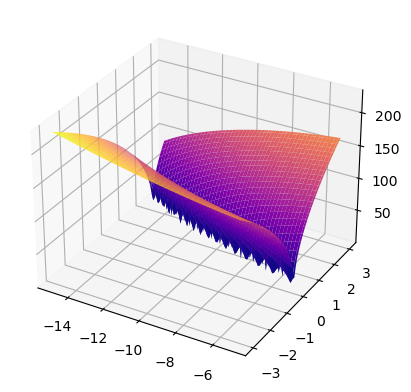

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def Bukin(x, y):
    return 100 * np.sqrt(abs(y - 0.01 * x ** 2)) + 0.01 * abs(x + 10)


x = np.linspace(-15, -5, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)

Z = Bukin(X, Y)

fig = plt.figure()
style = fig.add_subplot(projection='3d')
_ = style.plot_surface(X, Y, Z, cmap='plasma')
plt.show()

*Ex. 2:* 

Write a Hill Climbing algorithm that finds this functions minimum.

Hints: 

define a state, define a neighbour, choose a proper stop criteria before implementing the algorithm.

In [2]:
import random

state = [-10, -3]

def get_neighbour(state, step_size=1):
    x, y = state
    x_new = x + random.choice([-step_size, step_size])
    y_new = y + random.choice([-step_size, step_size])
    return [x_new, y_new]

max_iterations = 10000
no_improvement_count = 0
current_value = Bukin(state[0], state[1])

for i in range(max_iterations):
    neighbour = get_neighbour(state)
    neighbour_value = Bukin(neighbour[0], neighbour[1])

    if neighbour_value < current_value:
        current_value = neighbour_value
        state = neighbour
        no_improvement_count = 0
    else:
        no_improvement_count += 1

    if no_improvement_count >= 50 or current_value <= 0:
        break

print(f"Minimum value found: {current_value:.6f}")
print(f"at x={state[0]:.6f}, y={state[1]:.6f}")

Minimum value found: 60.020000
at x=-8.000000, y=1.000000


*Ex. 3:* for 1 point 

Implement a hill climbing algorithm for the knapsack problem. 

Hints:
For n elements:

we begin with an empty string of n zeros.

a neighbour is constructed by switching of zero into an one at a position in the array

Does it find the optimum? 


In [3]:
import random

def knapsack(values, weights, capacity, max_iterations):
    n = len(values)
    state = [0] * n
    current_value = 0
    current_weight = 0

    for i in range(max_iterations):
        # Generate a neighboring state by flipping a random zero to one
        neighbor = state.copy()
        while True:
            index = random.randint(0, n - 1)
            if neighbor[index] == 0:
                neighbor[index] = 1
                break
        
        # Evaluate the fitness of the current and neighboring states
        neighbor_value = sum(values[i] for i in range(n) if neighbor[i])
        neighbor_weight = sum(weights[i] for i in range(n) if neighbor[i])

        # If the neighbor fits in the knapsack and has higher value than the current state, move to it
        if neighbor_weight <= capacity and neighbor_value > current_value:
            state = neighbor
            current_value = neighbor_value
            current_weight = neighbor_weight

    return state, current_value, current_weight

In [4]:
values = np.array([3, 2, 7, 5, 4])
weights = np.array([2, 1, 4, 3, 2])
capacity = 8
max_iterations = 100000

state, value, weight = knapsack(values, weights, capacity, max_iterations)

print("Final state: ", state)
print("Knapsack value: ", value)
print("Knapsack weight: ", weight)

Final state:  [1, 1, 0, 1, 1]
Knapsack value:  14
Knapsack weight:  8



*Ex. 4:* for 1 point

Improve it to increase the chances of finding the solution.  

In [5]:
def knapsack_value(solution, values, weights, capacity):
    total_value = np.sum(solution * values)
    total_weight = np.sum(solution * weights)
    
    if total_weight > capacity:
        total_value -= (total_weight - capacity) * np.mean(values)
    
    return total_value

def hill_climbing_knapsack_improved(values, weights, capacity, num_restarts=10, max_iterations=1000):
    best_solution = None
    best_value = -np.inf
    
    for _ in range(num_restarts):
        state, value, weight = knapsack(values, weights, capacity, max_iterations)
        value = knapsack_value(state, value, weight, capacity)
        
        if value > best_value:
            best_solution = state
            best_value = value
    
    return best_solution

solution = hill_climbing_knapsack_improved(values, weights, capacity)
print(solution, ": ", knapsack_value(state, values, weights, capacity))

[1, 1, 1, 0, 0] :  14
